In [1]:
import pandas as pd

In [6]:
data_url = "https://www.kaggleusercontent.com/datasets/teejmahal20/airline-passenger-satisfaction/download"  # Example link
df = pd.read_csv("Airline-Satisfaction.csv")  # Replace with actual dataset
print(df.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [8]:
# Check data types and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [9]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding 'Gender' and other categorical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print(df.head())  # Verify the transformation


   Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0  19556       0              0   52               0      1   
1           1  90035       0              0   36               0      0   
2           2  12360       1              1   20               0      1   
3           3  77959       1              0   44               0      0   
4           4  36875       0              0   49               0      1   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   ...  Inflight entertainment  On-board service  Leg room service  

In [10]:
# OneHotEncoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df.head())  # Verify dummy variable creation


   Unnamed: 0     id  Age  Flight Distance  Inflight wifi service  \
0           0  19556   52              160                      5   
1           1  90035   36             2863                      1   
2           2  12360   20              192                      2   
3           3  77959   44             3377                      0   
4           4  36875   49             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  ...  Inflight service  Cleanliness  \
0               3                4  

In [13]:
print(df.dtypes)


Unnamed: 0                             int64
id                                     int64
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
Gender_1                                bool
Customer T

In [15]:
# Convert 'Satisfaction' to numeric if it's still a string
if df['satisfaction'].dtype == 'object':
    df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
print(df['satisfaction'].head())


0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64


In [17]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'satisfaction' in numeric_cols:
    numeric_cols.remove('satisfaction')

# Proceed with scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())


   Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
0    0.000000  0.150462  0.576923         0.026050                    1.0   
1    0.000038  0.693193  0.371795         0.571890                    0.2   
2    0.000077  0.095049  0.166667         0.032512                    0.4   
3    0.000115  0.600200  0.474359         0.675687                    0.0   
4    0.000154  0.283829  0.538462         0.232431                    0.4   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                0.8                     0.6           0.75   
1                                0.2                     0.6           0.00   
2                                0.0                     0.4           0.75   
3                                0.0                     0.0           0.25   
4                                0.6                     0.8           0.50   

   Food and drink  Online boarding  ...  Inflight service  Cle

In [18]:
# Debugging checks
print("Numeric Columns:", numeric_cols)
print("Data Types:\n", df.dtypes)


Numeric Columns: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Data Types:
 Unnamed: 0                           float64
id                                   float64
Age                                  float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service           

In [21]:
# Handle missing values
df = df.fillna(df.mean())  # Filling numeric columns with the mean

# Normalize numeric data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender_1', 'Customer Type_1', 'Type of Travel_1'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  float64
 1   id                                 25976 non-null  float64
 2   Age                                25976 non-null  float64
 3   Flight Distance                    25976 non-null  float64
 4   Inflight wifi service              25976 non-null  float64
 5   Departure/Arrival time convenient  25976 non-null  float64
 6   Ease of Online booking             25976 non-null  float64
 7   Gate location                      25976 non-null  float64
 8   Food and drink                     25976 non-null  float64
 9   Online boarding                    25976 non-null  float64
 10  Seat comfort                       25976 non-null  float64
 11  Inflight entertainment             25976 non-null  flo

In [23]:
# Create a new DataFrame for the training set with clusters
train_df = X_train.copy()
train_df['Cluster'] = clusters

print(train_df.head())  # Verify clusters are added to the training set


       Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
15026    0.578479  0.055229  0.217949         0.021002                    0.2   
1957     0.075342  0.873864  0.512821         0.747981                    0.4   
13238    0.509644  0.158825  0.256410         0.177706                    0.6   
6013     0.231492  0.370306  0.615385         0.046042                    0.6   
19848    0.764119  0.652249  0.410256         0.104200                    0.8   

       Departure/Arrival time convenient  Ease of Online booking  \
15026                                0.4                     0.2   
1957                                 0.4                     0.4   
13238                                0.4                     0.6   
6013                                 0.6                     0.8   
19848                                0.8                     0.8   

       Gate location  Food and drink  Online boarding  ...  \
15026           0.50             0.2      

In [24]:
# Fit KMeans on the entire dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters to the full DataFrame
df['Cluster'] = clusters

print(df.head())  # Verify clusters are added to the full dataset


   Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
0    0.000000  0.150462  0.576923         0.026050                    1.0   
1    0.000038  0.693193  0.371795         0.571890                    0.2   
2    0.000077  0.095049  0.166667         0.032512                    0.4   
3    0.000115  0.600200  0.474359         0.675687                    0.0   
4    0.000154  0.283829  0.538462         0.232431                    0.4   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                0.8                     0.6           0.75   
1                                0.2                     0.6           0.00   
2                                0.0                     0.4           0.75   
3                                0.0                     0.0           0.25   
4                                0.6                     0.8           0.50   

   Food and drink  Online boarding  ...  satisfaction  Class_1

In [27]:
# Fit KMeans on the full dataset
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Split data after clustering
X = df.drop(columns=['satisfaction'])  # Features
y = df['satisfaction']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
print("Length of clusters:", len(clusters))
print("Length of DataFrame:", len(df))


Length of clusters: 25976
Length of DataFrame: 25976


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Split the data into features and labels
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 customer segments
# Fit KMeans on the entire dataset (X) instead of just the training data (X_train)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters  # Now clusters and df have the same length

# Random Forest Classifier for recommendations
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
print(f"Model Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Model Accuracy: 95.33%


In [31]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4411
           1       0.96      0.93      0.95      3382

    accuracy                           0.95      7793
   macro avg       0.95      0.95      0.95      7793
weighted avg       0.95      0.95      0.95      7793



In [32]:
import numpy as np

# Simulate A/B testing results
np.random.seed(42)
group_a = np.random.choice([1, 0], size=1000, p=[0.85, 0.15])  # 85% satisfied
group_b = np.random.choice([1, 0], size=1000, p=[0.65, 0.35])  # 65% satisfied

# Analyze
satisfaction_a = np.mean(group_a) * 100
satisfaction_b = np.mean(group_b) * 100
print(f"Group A Satisfaction: {satisfaction_a:.2f}%")
print(f"Group B Satisfaction: {satisfaction_b:.2f}%")


Group A Satisfaction: 84.70%
Group B Satisfaction: 63.00%


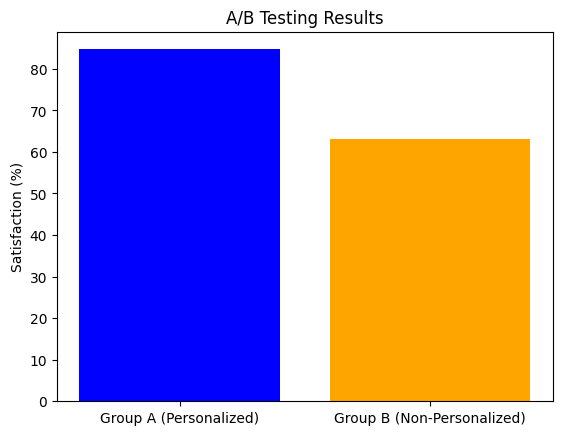

In [33]:
import matplotlib.pyplot as plt

# Bar chart for A/B testing
labels = ['Group A (Personalized)', 'Group B (Non-Personalized)']
values = [satisfaction_a, satisfaction_b]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('A/B Testing Results')
plt.ylabel('Satisfaction (%)')
plt.show()
